Cargar los datos de load_boston de la librería de scikit-learn.
Para las siguientes variables realizar la transformación que mejor aproxime a una gaussiana (considere las transformaciones del tipo $ x−−√n, logn(x), o xn $, buscando una n adecuada).  
-CRIM  
-ZN  
-INDUS  
-NOX  
-RM  
-AGE  
-DIS  
-PTRATIO  
-B  
-LSTAT  

In [179]:
from sklearn.datasets  import load_boston
import pandas as pd
import numpy as np

In [198]:
data= load_boston()
df= pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [199]:
df=df.drop(['CHAS','RAD','TAX'], axis=1)
df.skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
dtype: float64

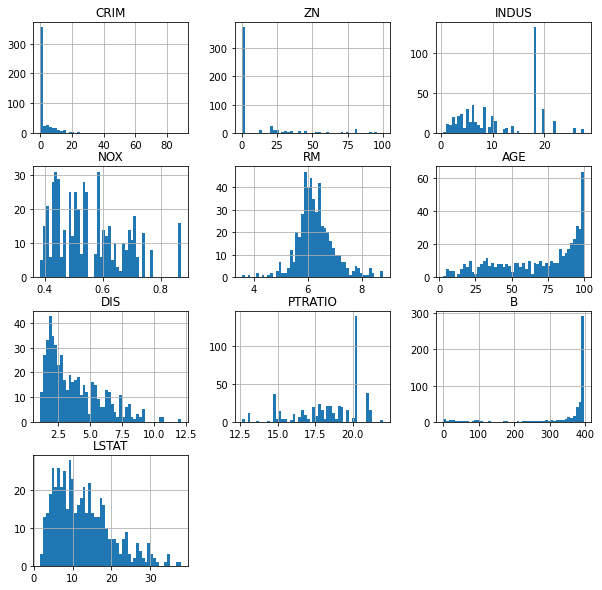

In [200]:
H=df.hist(figsize=(10,10),bins=50)

In [201]:
f=[lambda x:x**3,lambda x:x**4,lambda x:x**5,lambda x:x**(1/2),lambda x:x**(1/3),lambda x:np.log(x)]
# def f(x,n):
#    return x**n
y=f[0](df['CRIM'])
y.skew()

14.199902068166104

In [202]:
mejor=[]
for col in dt.columns:
  sesgo=[]
  for fun in f:
    #sesgo.append(fun(df[col]-min(df[col])+1).skew())
    sesgo.append(fun(df[col]).skew())
  indice=np.where(min(np.abs(sesgo))==np.abs(sesgo))[0][0]
  mejor.append((indice,sesgo[indice],col))
mejor

C:\Users\Emilio\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[(5, 0.4059344988496048, 'CRIM'),
 (4, 1.262562718232027, 'ZN'),
 (3, -0.0726093860362781, 'INDUS'),
 (5, 0.3577796083043403, 'NOX'),
 (4, -0.04519857161910971, 'RM'),
 (0, 0.07091684320803471, 'AGE'),
 (5, 0.15273013181129969, 'DIS'),
 (2, -0.12769859904778316, 'PTRATIO'),
 (2, -1.6776551693481085, 'B'),
 (4, 0.10348487616653473, 'LSTAT')]

In [203]:
dt=df.copy()
dt['CRIM']=np.log(df.CRIM)
dt['ZN']=df.ZN**(1/3)
dt['INDUS']=df.INDUS**(1/2)
dt['NOX']=np.log(df.NOX)
dt['RM']=df.RM**(1/3)
dt['AGE']=df.AGE**2
dt['DIS']=np.log(df.DIS)
dt['PTRATIO']=df.PTRATIO**5
dt['B']=df.B**5
dt['LSTAT']=df.LSTAT**(1/3)
dt.head(),dt.skew()

(       CRIM        ZN     INDUS       NOX        RM      AGE       DIS  \
 0 -5.064036  2.620741  1.519868 -0.619897  1.873406  4251.04  1.408545   
 1 -3.600502  0.000000  2.658947 -0.757153  1.858664  6225.21  1.602836   
 2 -3.601235  0.000000  2.658947 -0.757153  1.929637  3733.21  1.602836   
 3 -3.430523  0.000000  1.476482 -0.780886  1.912749  2097.64  1.802073   
 4 -2.672924  0.000000  1.476482 -0.780886  1.926229  2937.64  1.802073   
 
         PTRATIO             B     LSTAT  
 0  8.384114e+05  9.849303e+12  1.707693  
 1  1.786899e+06  9.849303e+12  2.090814  
 2  1.786899e+06  9.354557e+12  1.591360  
 3  2.286694e+06  9.570850e+12  1.432570  
 4  2.286694e+06  9.849303e+12  1.746797  ,
 CRIM       0.405934
 ZN         1.262563
 INDUS     -0.072609
 NOX        0.357780
 RM        -0.045199
 AGE       -0.183180
 DIS        0.152730
 PTRATIO   -0.127699
 B         -1.677655
 LSTAT      0.103485
 dtype: float64)

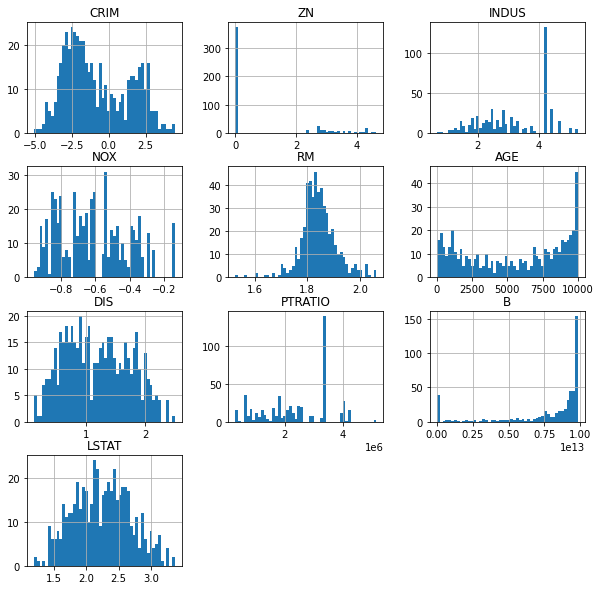

In [205]:
ht=dt.hist(figsize=(10,10),bins=50)